In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
# import requests as re
from dateutil.parser import parse
from ucimlrepo import fetch_ucirepo 
import seaborn as sns

# Nuclear dataset

In [2]:
nuclear_data = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/boot/nuclear.csv")

In [3]:
nuclear_data

,rownames,cost,date,t1,t2,cap,pr,ne,ct,bw,cum.n,pt
0,1,460.05,68.58,14,46,687,0,1,0,0,14,0
1,2,452.99,67.33,10,73,1065,0,0,1,0,1,0
2,3,443.22,67.33,10,85,1065,1,0,1,0,1,0
3,4,652.32,68.00,11,67,1065,0,1,1,0,12,0
4,5,642.23,68.00,11,78,1065,1,1,1,0,12,0
5,6,345.39,67.92,13,51,514,0,1,1,0,3,0
6,7,272.37,68.17,12,50,822,0,0,0,0,5,0
7,8,317.21,68.42,14,59,457,0,0,0,0,1,0
8,9,457.12,68.42,15,55,822,1,0,0,0,5,0
9,10,690.19,68.33,12,71,792,0,1,1,1,2,0


In [4]:
mean_cost = nuclear_data['cost'].mean()

In [5]:
print(f"Mean cost is {round(mean_cost,2)}")

Mean cost is 461.56


In [6]:
nuclear_data['ne'] = nuclear_data['ne'].astype(bool)

In [7]:
count_stations = nuclear_data['ne'].value_counts()

In [8]:
count_stations

ne
False    24
True      8
Name: count, dtype: int64

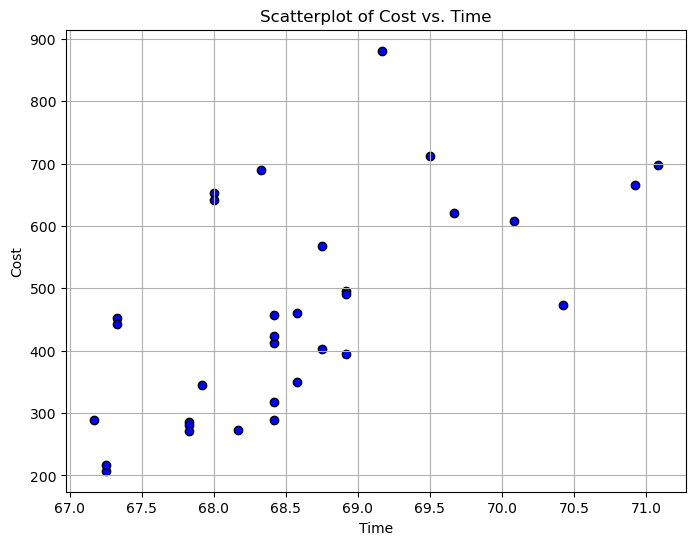

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(nuclear_data['date'], nuclear_data['cost'], color='blue', edgecolor='k')
plt.title('Scatterplot of Cost vs. Time')
plt.xlabel('Time')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [10]:
nuclear_data.cap.max()

1130

In [11]:
correlation_ab = nuclear_data['cost'].corr(nuclear_data['date'])

In [12]:
correlation_ab

0.6104542506093877

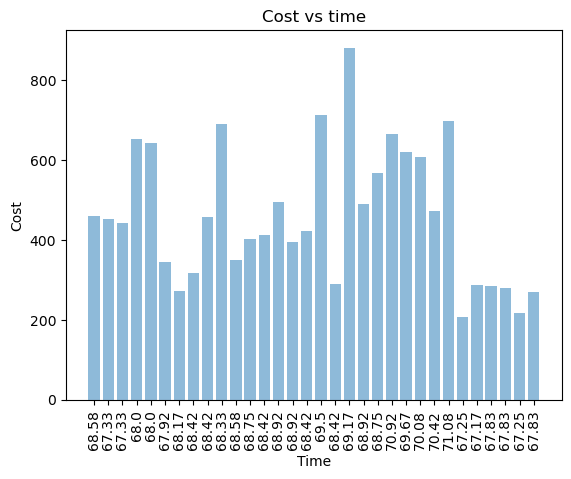

In [13]:
objects = nuclear_data['date']
y_pos = np.arange(len(objects))
performance = nuclear_data['cost']

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Cost')
plt.title('Cost vs time')

plt.show()

In [14]:
correlation_matrix = nuclear_data.corr()
print(correlation_matrix)

          rownames      cost      date        t1        t2       cap  \
rownames  1.000000 -0.179858  0.190011  0.180626  0.014225  0.008699   
cost     -0.179858  1.000000  0.610454  0.456524  0.005525  0.471761   
date      0.190011  0.610454  1.000000  0.857855 -0.403985  0.019629   
t1        0.180626  0.456524  0.857855  1.000000 -0.474292 -0.093526   
t2        0.014225  0.005525 -0.403985 -0.474292  1.000000  0.313031   
cap       0.008699  0.471761  0.019629 -0.093526  0.313031  1.000000   
pr        0.211758 -0.100361 -0.054818  0.050820  0.443166  0.160703   
ne       -0.429897  0.378662  0.097498  0.087039 -0.155188 -0.006583   
ct       -0.210186  0.219033 -0.045607 -0.129497  0.187354  0.028720   
bw        0.329514 -0.134398 -0.160044 -0.374174  0.358025  0.112013   
cum.n     0.376220  0.275181  0.549407  0.399658 -0.227679  0.193394   
pt        0.676371 -0.583377 -0.506972 -0.398314  0.178034  0.007195   

                pr        ne        ct        bw     cum.n     

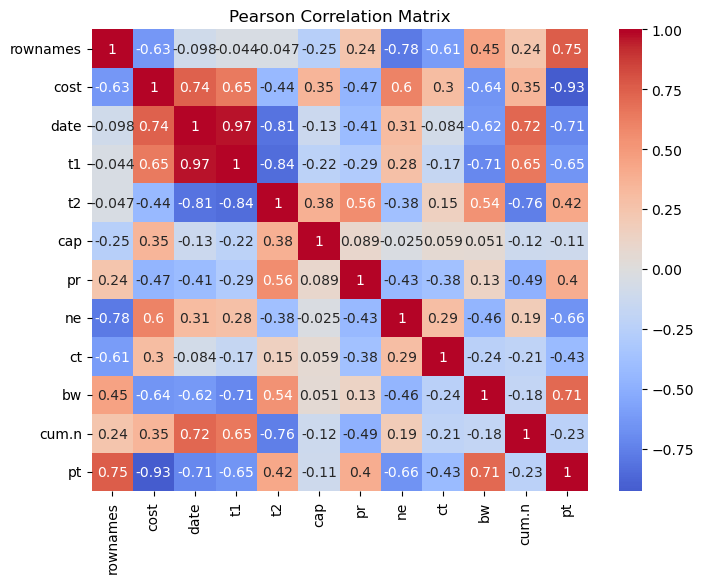

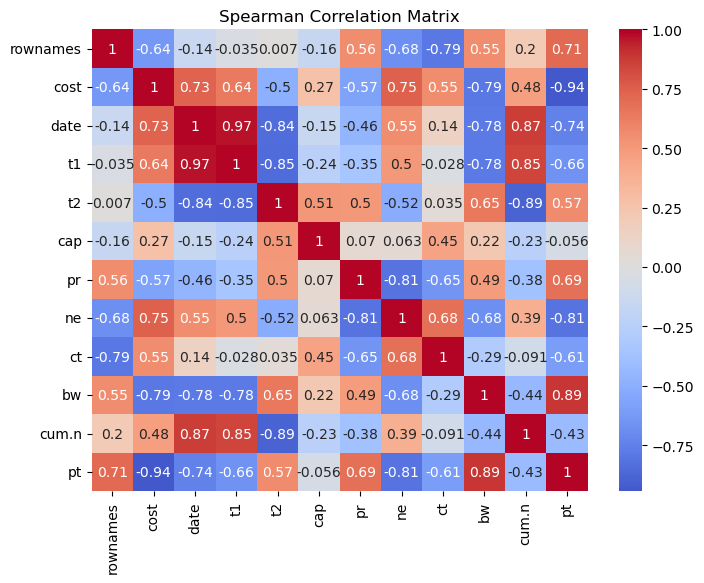

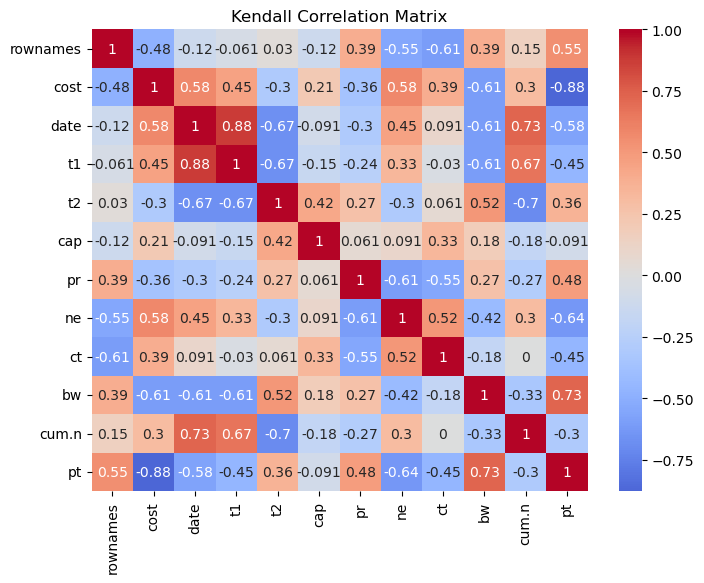

In [15]:
correlation_methods = ['pearson', 'spearman', 'kendall']

for method in correlation_methods:
    corr_matrix = correlation_matrix.corr(method=method)
    
    # Plotting the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'{method.capitalize()} Correlation Matrix')
    plt.show()

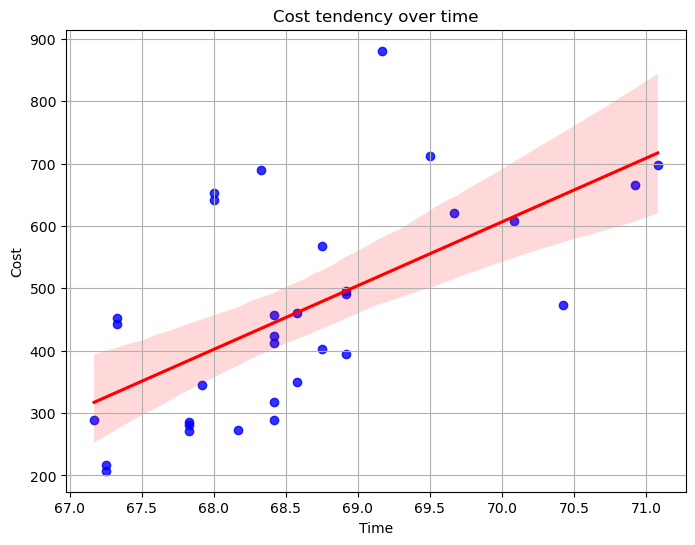

In [16]:
df = pd.DataFrame(nuclear_data)

# Create a scatterplot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='date', y='cost', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Cost tendency over time')
plt.xlabel('Time')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

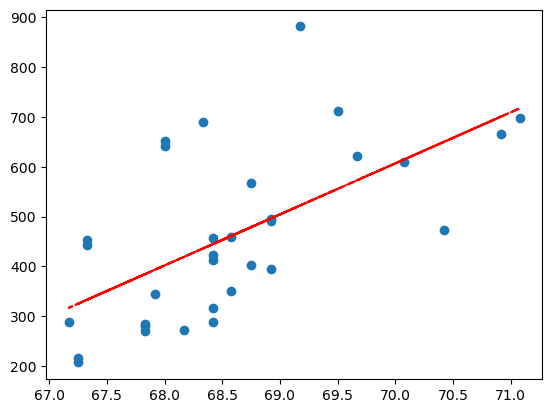

In [21]:
data = nuclear_data[['date', 'cost']]
x = data['date']
y = data['cost']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()